# Importing Libaries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


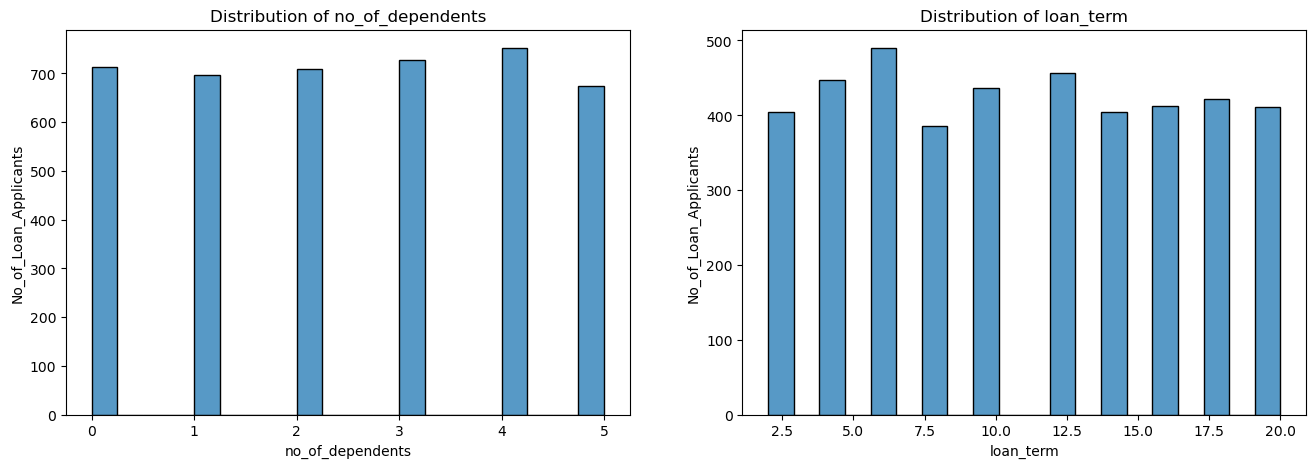

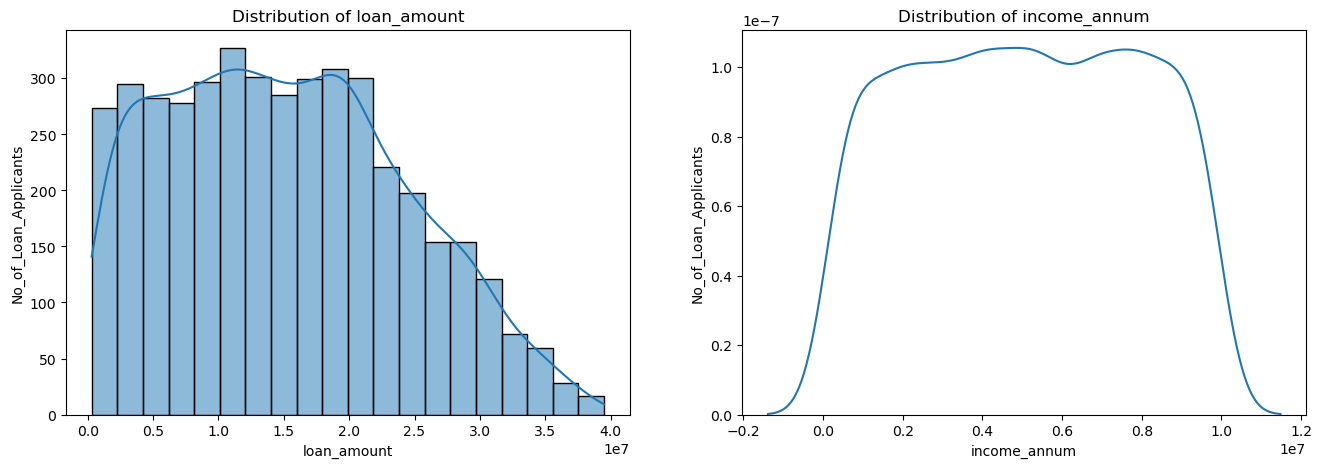

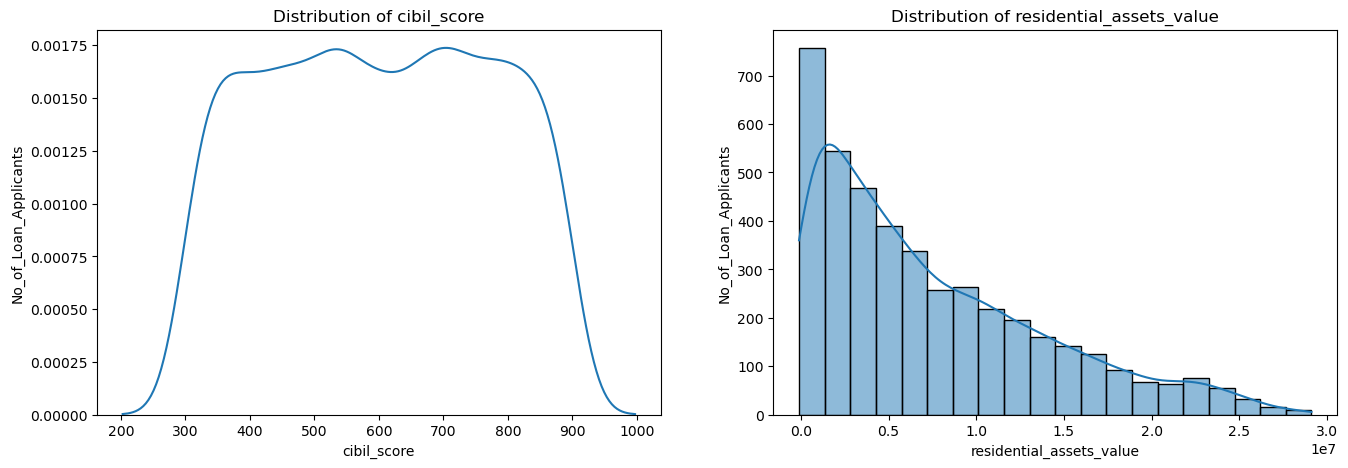

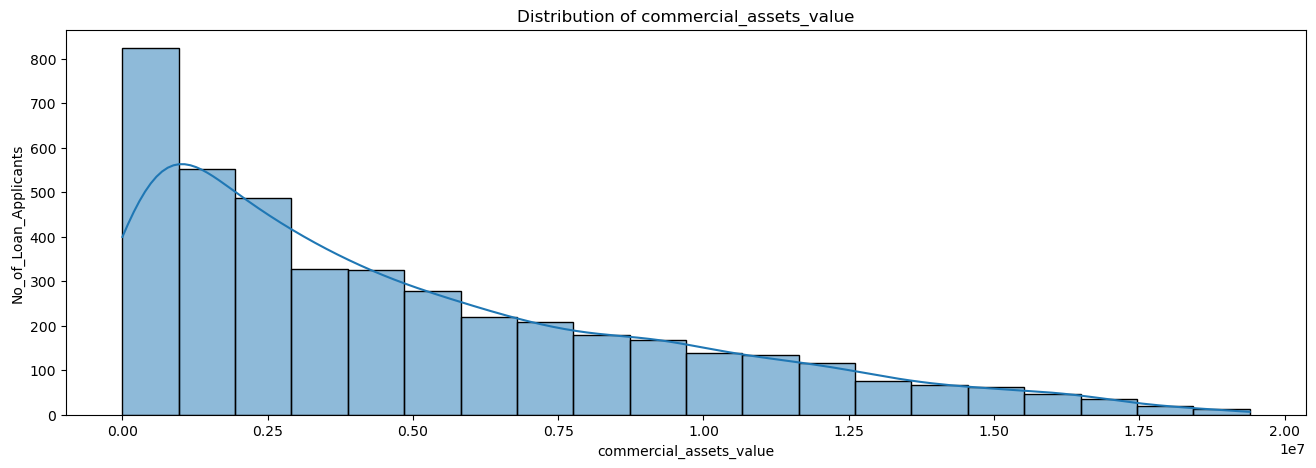

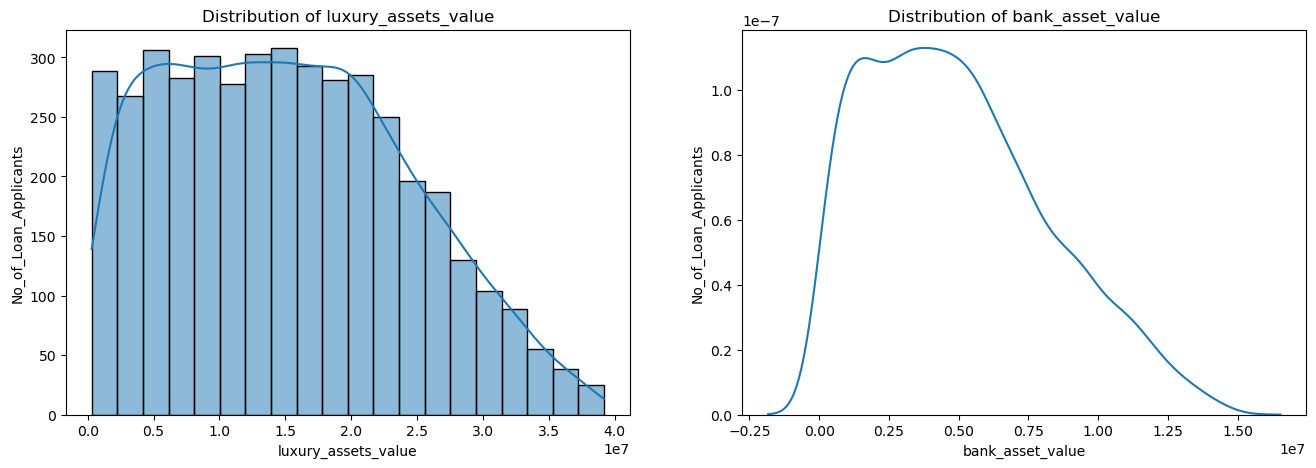

In [5]:
#-------------------------------------------uni varient Anlaysis----------------------------------------------------------#

##For Numerical Features

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df,x="no_of_dependents",bins=20,kde=False).set(title="Distribution of no_of_dependents",ylabel="No_of_Loan_Applicants")



plt.subplot(1,2,2)
sns.histplot(df,x="loan_term",bins=20,kde=False).set(title="Distribution of loan_term",ylabel="No_of_Loan_Applicants")
plt.show() 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df,x="loan_amount",bins=20,kde=True).set(title="Distribution of loan_amount",ylabel="No_of_Loan_Applicants")

plt.subplot(1,2,2)
sns.kdeplot(df,x="income_annum",).set(title="Distribution of income_annum",ylabel="No_of_Loan_Applicants")
plt.show() 

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df,x="cibil_score",).set(title="Distribution of cibil_score",ylabel="No_of_Loan_Applicants")


plt.subplot(1,2,2)
sns.histplot(df,x="residential_assets_value",bins=20,kde=True).set(title="Distribution of residential_assets_value",ylabel="No_of_Loan_Applicants")
plt.show()

plt.figure(figsize=(16,5))
sns.histplot(df,x="commercial_assets_value",bins=20,kde=True).set(title="Distribution of commercial_assets_value",ylabel="No_of_Loan_Applicants")
plt.show() 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df,x="luxury_assets_value",bins=20,kde=True).set(title="Distribution of luxury_assets_value",ylabel="No_of_Loan_Applicants")

plt.subplot(1,2,2)
sns.kdeplot(df,x="bank_asset_value").set(title="Distribution of bank_asset_value",ylabel="No_of_Loan_Applicants")
plt.show()

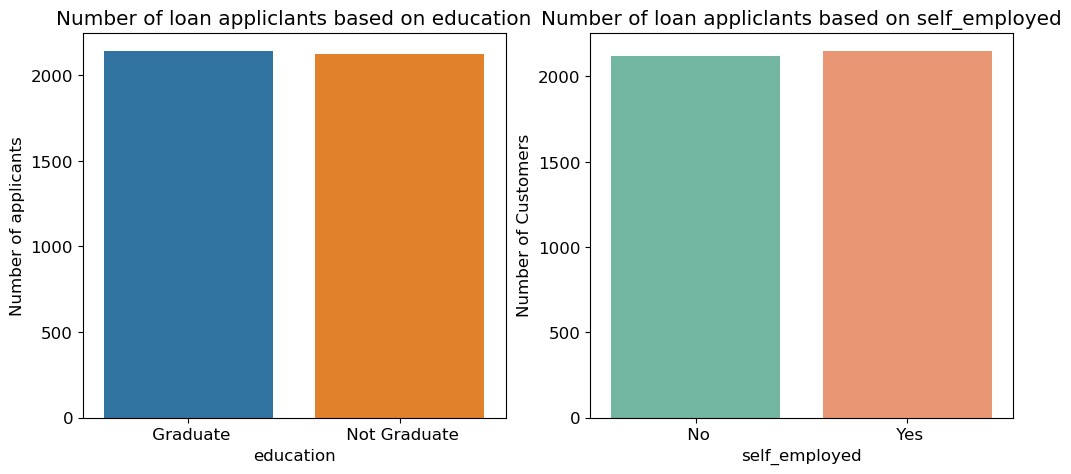

In [36]:
#-------------------------------------------uni varient Anlaysis----------------------------------------------------------#

##For categorical Features 

#categorical features 


#education
#self_employed 
#loan_status  

plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)

sns.countplot(df,x= df["education"], ax=ax1,)
plt.title("Number of loan appliclants based on education")
plt.ylabel("Number of applicants")

ax2 = plt.subplot(1,2,2)

sns.countplot(df,x=df['self_employed'], ax=ax2, palette = "Set2")
plt.title("Number of loan appliclants based on self_employed")
plt.ylabel("Number of Customers")
plt.show()




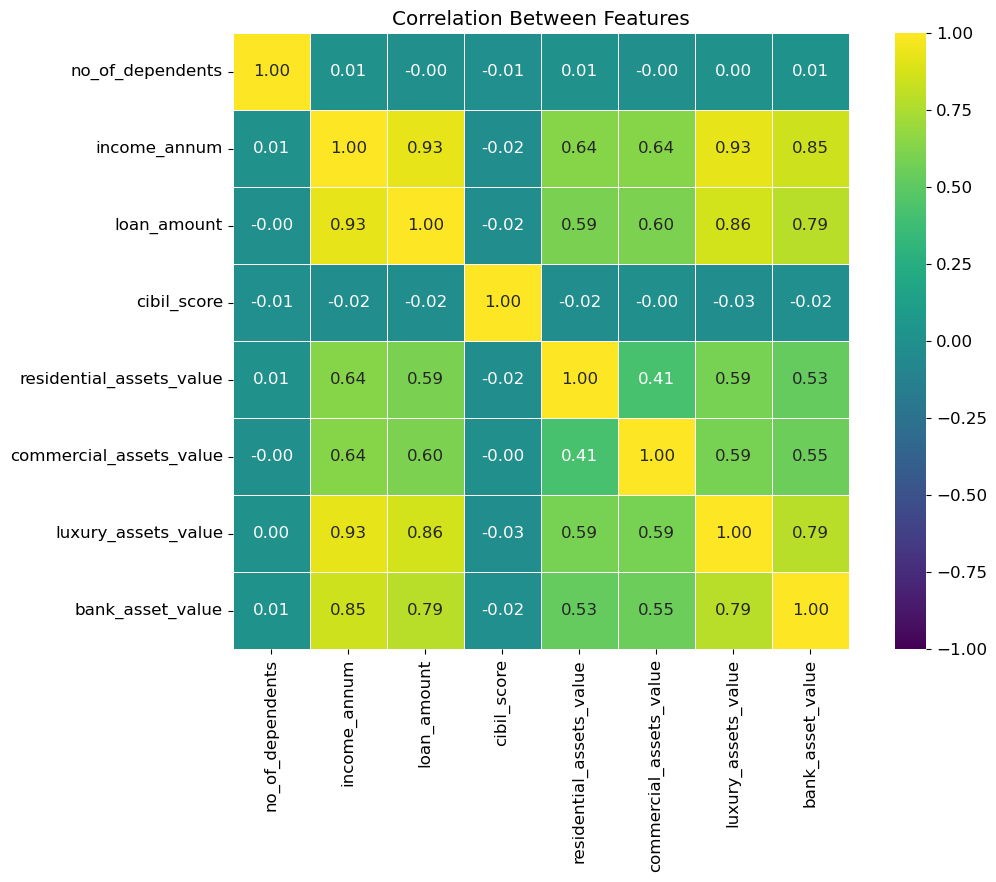

In [35]:
#-------------------------------------------Multi-varient Anlaysis----------------------------------------------------------#

corr_df=df[["no_of_dependents","income_annum","loan_amount","cibil_score","residential_assets_value",'commercial_assets_value','luxury_assets_value','bank_asset_value']]



correlation_matrix = corr_df.corr()
plt.figure(figsize = (12,8))
plt.title("Correlation Between Features")
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


# Feature Engineering

In [8]:
#Feature Transformation
##Handling Missing Values 
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Conclusion: 
There is no missing values in the data

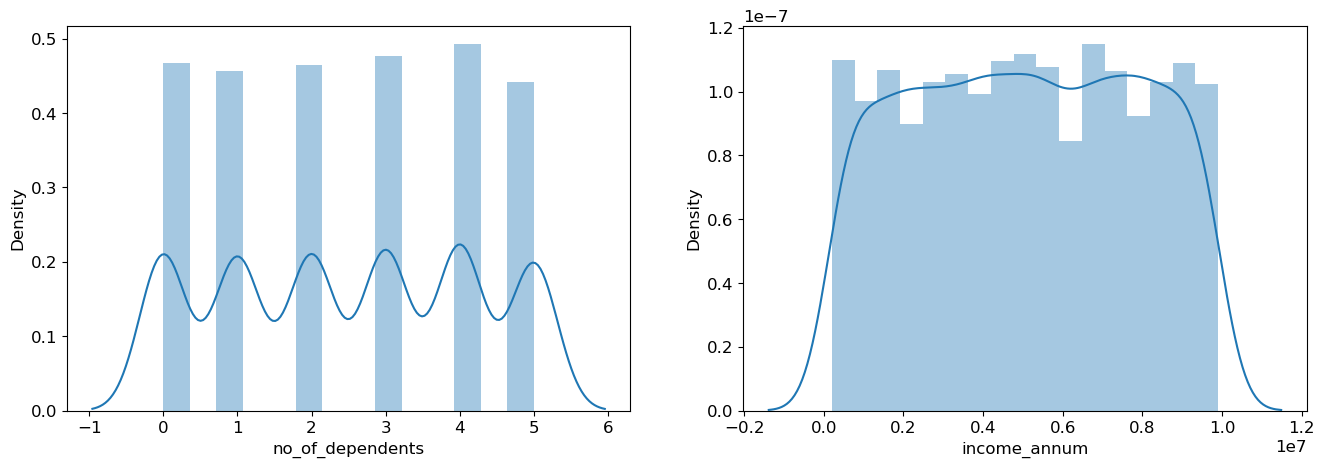

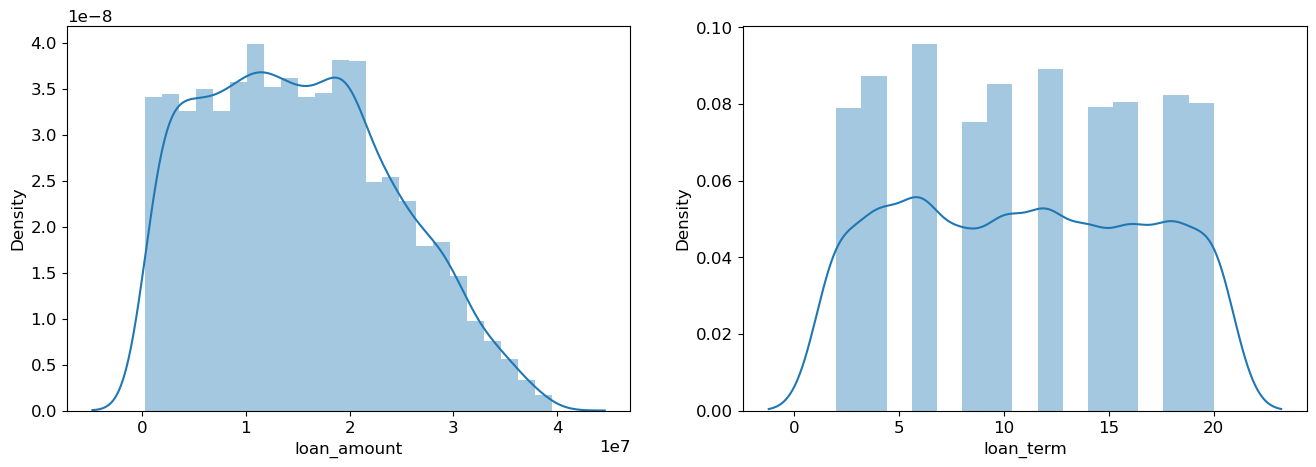

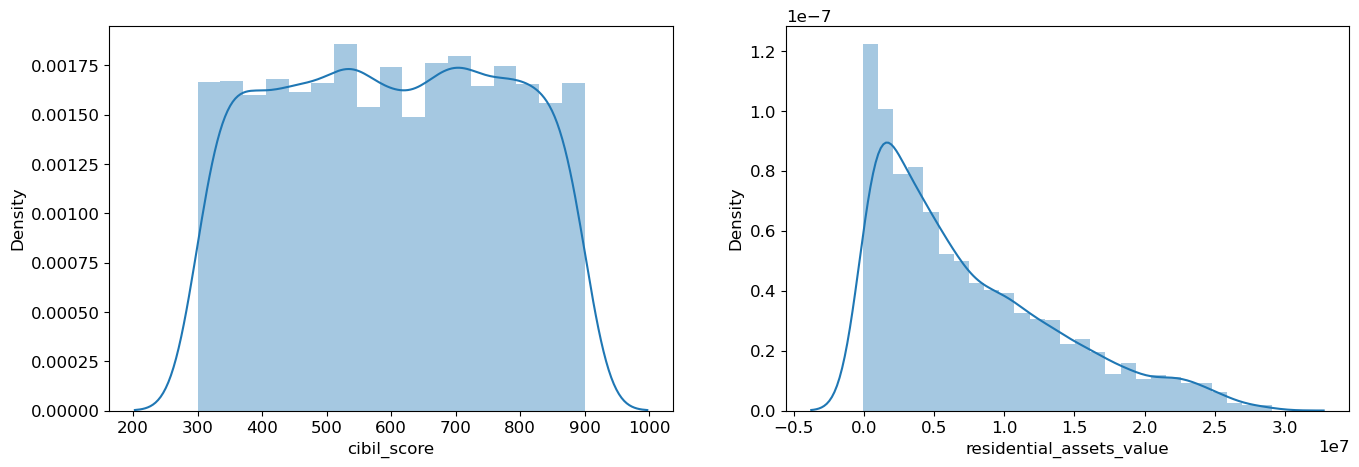

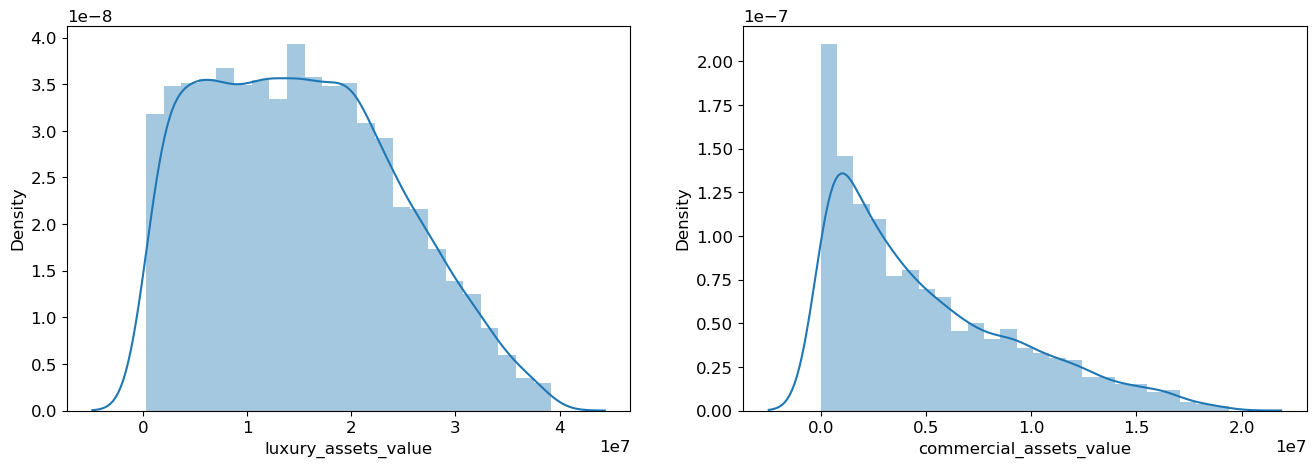

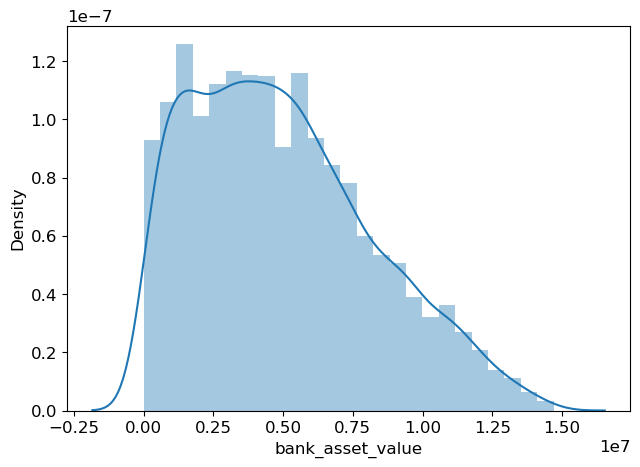

In [9]:
#Handling outlier 

plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(df['no_of_dependents'])


plt.subplot(1,2,2) 
sns.distplot(df['income_annum'])  
plt.show()


plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(df['loan_amount'])

plt.subplot(1,2,2) 
sns.distplot(df['loan_term']) 
plt.show() 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(df['cibil_score'])

plt.subplot(1,2,2) 
sns.distplot(df['residential_assets_value']) 
plt.show() 


plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(df['luxury_assets_value'])

plt.subplot(1,2,2) 
sns.distplot(df['commercial_assets_value']) 
plt.show() 

plt.figure(figsize=(16,5))
plt.subplot(1,2,2) 
sns.distplot(df['bank_asset_value']) 
plt.show() 


In [10]:
#outliers detection and removing from data
per25 = df['loan_amount'].quantile(0.25) 
per75 = df['loan_amount'].quantile(0.75) 
iqr = per75 - per25 
iqr
upper_limit = per75 + 1.5*iqr 
lower_limit = per75 - 1.5*iqr 
lower_limit #800000.0
upper_limit  #42200000.0
# Outliers counts is less than 5% then removed 
new_df = df[((df['loan_amount']>=lower_limit))]
df.shape,new_df.shape

#----------- 

per25 = new_df['residential_assets_value'].quantile(0.25) 
per75 = new_df['residential_assets_value'].quantile(0.75) 
iqr = per75 - per25 
iqr
upper_limit = per75 + 1.5*iqr 
lower_limit = per75 - 1.5*iqr 
lower_limit 
upper_limit  #42200000.0
new_df[new_df['residential_assets_value']>upper_limit].shape
new_df1 = new_df[new_df['residential_assets_value']<=upper_limit] 
new_df.shape,new_df1.shape

#-------------------- 

#outliers detection and removing from data
per25 = new_df['luxury_assets_value'].quantile(0.25) 
per75 = new_df['luxury_assets_value'].quantile(0.75) 
iqr = per75 - per25 
iqr
upper_limit = per75 + 1.5*iqr 
lower_limit = per75 - 1.5*iqr 
lower_limit , upper_limit  #42200000.0
new_df1[new_df1['luxury_assets_value']<lower_limit].count()
new_df2 = new_df1[(new_df1['luxury_assets_value']>=lower_limit)]
new_df1.shape,new_df2.shape 

#---------------------

#outliers detection and removing from data
per25 = new_df['commercial_assets_value'].quantile(0.25) 
per75 = new_df['commercial_assets_value'].quantile(0.75) 
iqr = per75 - per25 
iqr
upper_limit = per75 + 1.5*iqr 
lower_limit = per75 - 1.5*iqr 
lower_limit #800000.0
upper_limit  #42200000.0
new_df2[((new_df2['commercial_assets_value']>upper_limit))].count()#35
new_df3 = new_df2[new_df2['commercial_assets_value']<=upper_limit]
new_df2.shape,new_df3.shape 

#------------------ 

#outliers detection and removing from data
per25 = new_df['bank_asset_value'].quantile(0.25) 
per75 = new_df['bank_asset_value'].quantile(0.75) 
iqr = per75 - per25 
iqr
upper_limit = per75 + 1.5*iqr 
lower_limit = per75 - 1.5*iqr 
lower_limit #800000.0
upper_limit  #42200000.0
new_df3[(new_df3['bank_asset_value']>upper_limit )].count()/new_df.count() 
new_df4 = new_df3[(new_df3['bank_asset_value']<=upper_limit )]
new_df3.shape,new_df4.shape 



#After Removing outliers
df.shape,new_df4.shape
data = new_df4

In [11]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [12]:
x = data.iloc[:,:11]

In [13]:
y = data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler 

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 43)

In [16]:
transformer = ColumnTransformer(transformers=[
    ('tr1',OrdinalEncoder(categories = [[' Not Graduate',' Graduate'],[' No',' Yes']]),['education','self_employed'])
],remainder='passthrough')


In [17]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('tr1',
                                 OrdinalEncoder(categories=[[' Not Graduate',
                                                             ' Graduate'],
                                                            [' No', ' Yes']]),
                                 ['education', 'self_employed'])])

In [18]:
x_train1 =transformer.transform(x_train) 
x_test1 = transformer.fit_transform(x_test) 

In [19]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [20]:
y_train1 = le.transform(y_train) 
y_test1 = le.fit_transform(y_test)

In [21]:
scaler = StandardScaler() 
scaler.fit(x_train1) 

StandardScaler()

In [22]:
x_train_scaled = scaler.transform(x_train1) 
x_test_scaled = scaler.transform(x_test1) 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import metrics

In [24]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(1, 5, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'param' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        } 
    }, 
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'C': [1,5,10]
        }
    },
    'Ada_Boosting' : {
        'model': AdaBoostClassifier(), 
        'param': {
            'n_estimators': [10, 50, 100, 130,150,200], 
            'learning_rate':[0.01,0.1,0.5,1.0], 
            'algorithm':['SAMME', 'SAMME.R']
        }
    }

}

In [25]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5)
    model_selection.fit(x_train_scaled,y_train1)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [26]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9656012176560121,
  'best_params': {'criterion': 'entropy',
   'max_depth': 4,
   'max_features': 'log2',
   'n_estimators': 100}},
 {'model': 'svm',
  'best_score': 0.9424657534246574,
  'best_params': {'C': 20, 'kernel': 'rbf'}},
 {'model': 'logistic_regression',
  'best_score': 0.9095890410958904,
  'best_params': {'C': 1}},
 {'model': 'Ada_Boosting',
  'best_score': 0.9747336377473363,
  'best_params': {'algorithm': 'SAMME.R',
   'learning_rate': 1.0,
   'n_estimators': 200}}]

# Model Buildng

In [27]:
AdaBoost = AdaBoostClassifier(algorithm = 'SAMME.R',learning_rate = 1.0 , n_estimators = 200)
AdaBoost.fit(x_train_scaled,y_train1)

AdaBoostClassifier(n_estimators=200)

In [28]:
AdaBoost_prediction = AdaBoost.predict(x_test_scaled)

In [34]:
 AdaBoost_prediction

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

# Model Evaluation

In [30]:
print("The Complete classifiaction Report:",)
print()
print(metrics.classification_report(y_test1,AdaBoost_prediction))

The Complete classifiaction Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       506
           1       0.99      0.96      0.97       316

    accuracy                           0.98       822
   macro avg       0.98      0.98      0.98       822
weighted avg       0.98      0.98      0.98       822



In [31]:
print("The Accuarcy of the model is :",metrics.accuracy_score(y_test1,AdaBoost_prediction)*100)

The Accuarcy of the model is : 98.05352798053528


In [32]:
cm = metrics.confusion_matrix(y_test1,AdaBoost_prediction)

<Axes: title={'center': 'Confusion Matrix'}>

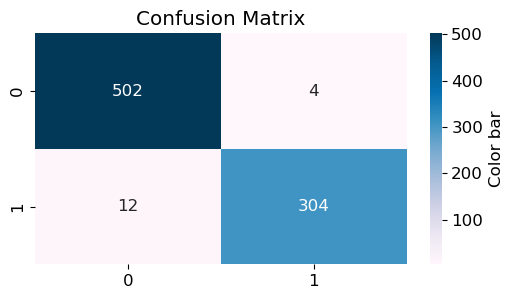

In [33]:
plt.figure(figsize=(6,3)) 
plt.title("Confusion Matrix")
sns.heatmap(cm,cmap = "PuBu",annot = True,xticklabels=[0,1],yticklabels= [0,1],cbar_kws = {'orientation':'vertical','label':'Color bar'},fmt='g')